In [36]:
import pickle
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955.0,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477.0,465,566,916197,5243487
BAXTER JOHN C,1200000.0,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102.0,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000.0,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671.0,NaN,NaN,827696,63014


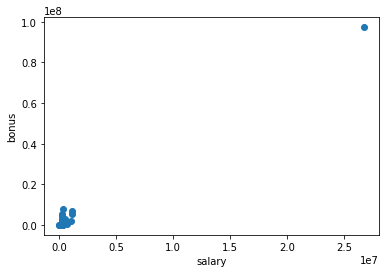

In [37]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel("salary")
plt.ylabel("bonus")

df = pd.DataFrame(data_dict)
df = df.T
df['bonus'] = pd.to_numeric(df['bonus'],errors='coerce')
df['salary'] = pd.to_numeric(df['salary'],errors='coerce')
df.head()

In [46]:
#df.dtypes
#df.loc[df['bonus'].idxmax()]
df[df['bonus']==df['bonus'].max()]
#df.loc['salary',:].idxmax(axis=1)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619.0,32083396,-27992891,1398517,NaN,311764000,5235198,NaN,NaN,NaN,...,48521928,42667589,False,130322299,-7576788,26704229.0,NaN,NaN,309886585,434509511


In [48]:
df = df.drop(['TOTAL'])

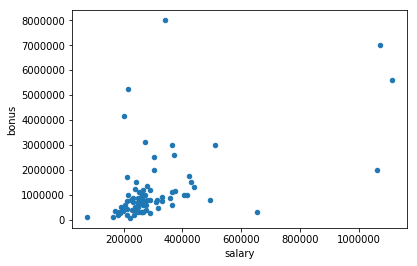

In [51]:
df.plot('salary','bonus',kind = 'scatter')

In [62]:
df2 = df[df['salary'] > 10**6]
df2

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
FREVERT MARK A,2000000.0,6426990,-3367011,NaN,mark.frevert@enron.com,10433518,86987,21,242,6,...,1617011,7427621,False,4188667,NaN,1060932.0,2979,3275,17252530,14622185
LAY KENNETH L,7000000.0,202911,-300000,NaN,kenneth.lay@enron.com,34348384,99832,36,123,16,...,3600000,10359729,True,14761694,NaN,1072321.0,2411,4273,103559793,49110078
SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000,29336,108,88,30,...,1920000,22122,True,6843672,NaN,1111258.0,2042,3627,8682716,26093672
